Module 4, Session 4
K-Means Clustering, Elbow & Silhouette Methods

Objective:
Implement K-Means clustering, understand its iterations, and determine the optimal number of clusters.

Exercise 1- Trace K-Means (Conceptual)

We are given the following points
A = (1,1)  
B = (1,2)  
C = (2,1)  
D = (5,4)  
E = (5,5)  
F = (6,4)

Number of clusters- k = 2

Initial centroids:
C1 = (1,1)
C2 = (5,4)

Iteration 1— Assignment Step

Distances are calculated using Euclidean distance

Points A, B, C are closer to C1
Points D, E, F are closer to C2

Cluster 1: A, B, C  
Cluster 2: D, E, F

Iteration 1— Update Step

New centroid positions:

C1 = mean of A, B, C
= ((1+1+2)/3 , (1+2+1)/3)
= (1.33 , 1.33)

C2 = mean of D, E, F
= ((5+5+6)/3 , (4+5+4)/3)
= (5.33 , 4.33)

Iteration 2

Using the updated centroids, all points remain in the same clusters.
Cluster assignments did NOT change.
The algorithm has converged.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

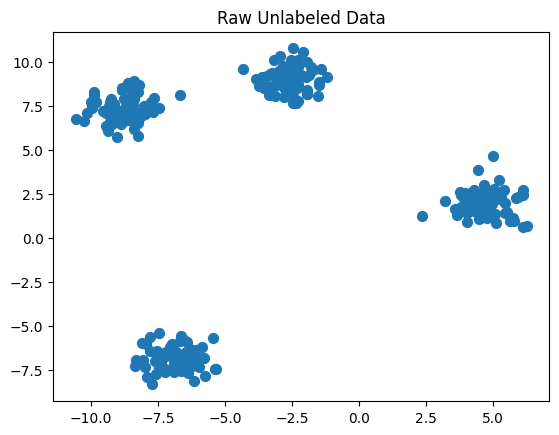

In [3]:
X, y = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.7,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Raw Unlabeled Data")
plt.show()

In [4]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


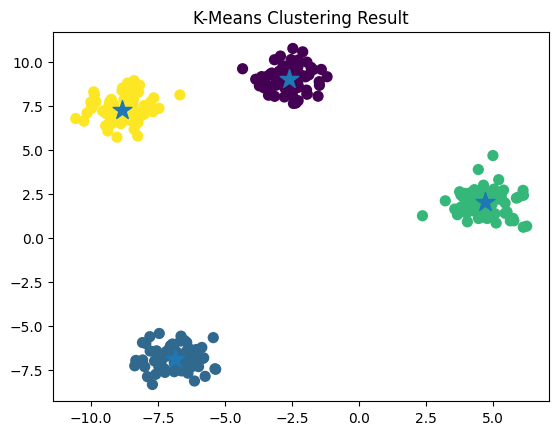

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    marker='*'
)
plt.title("K-Means Clustering Result")
plt.show()

In [6]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

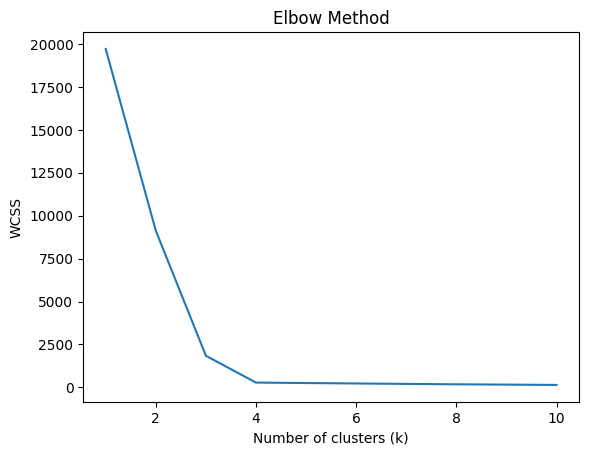

In [7]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

The elbow appears around k = 4, which confirms the optimal number of clusters.

In [8]:
sil_scores = []

for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

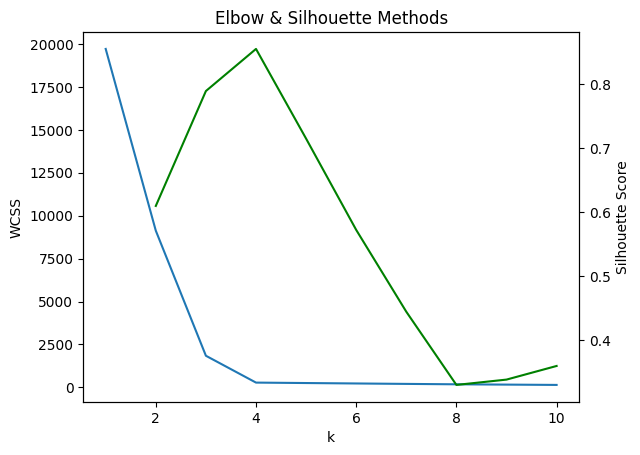

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(range(1, 11), wcss, label="WCSS")
ax1.set_xlabel("k")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(range(2, 11), sil_scores, label="Silhouette", color="green")
ax2.set_ylabel("Silhouette Score")

plt.title("Elbow & Silhouette Methods")
plt.show()

Both Elbow and Silhouette methods indicate that k = 4 is the optimal number of clusters.
Silhouette provides a clearer indication when Elbow is ambiguous.